### Exercise 1. Cosine Similarity with CBOW and Skip-Gram

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
  
warnings.filterwarnings(action = 'ignore')
  
import gensim
from gensim.models import Word2Vec
  
#  Reads ‘Europe_Covid.txt’ file
sample = open("Europe_Covid.txt", "r")
s = sample.read()
  
# Replaces escape character with space
f = s.replace("\n", " ")
  
data = []
  
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
      
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
  
    data.append(temp)
  
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1, 
                              size = 100, window = 5)
  
# Print results
print("Cosine similarity between 'curfew' " + 
               "and 'government' - CBOW : ",
    model1.similarity('curfew', 'government'))

  
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100,
                                             window = 5, sg = 1)
  
# Print results
print("Cosine similarity between 'curfew' " +
          "and 'government' - Skip Gram : ",
    model2.similarity('curfew', 'government'))


Cosine similarity between 'curfew' and 'government' - CBOW :  0.068113446
Cosine similarity between 'curfew' and 'government' - Skip Gram :  0.09537426


No is a slight difference of Cosine similarity between 'curfew' and 'government' for CBOW and Skip Gram

### Exercise 2. Compute the Jaccard similarity index

In [2]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
lemmatizer=WordNetLemmatizer()

In [4]:
pair1 = ["What you do defines you","Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

In [5]:
def extract_text_similarity_jaccard(text1,text2):
    words_text1=[lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text1)]
    words_text2=[lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text2)]
    nr=len(set(words_text1).intersection(set(words_text2)))
    dr=len(set(words_text1).union(set(words_text2)))
    jaccard_sim= nr/dr
    return jaccard_sim
    

In [6]:
extract_text_similarity_jaccard(pair1[0],pair1[1])



0.14285714285714285

### Exercise 3.What is the sentiment and subjectivity of the Europe_Covid text?

In [7]:
import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [8]:
sid.polarity_scores(s)

{'neg': 0.039, 'neu': 0.911, 'pos': 0.05, 'compound': 0.4691}

In [9]:
blob = TextBlob(s)
blob.sentiment.subjectivity

0.3476432095036746

### Exercise 4. WordCloud

In [10]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS

In [11]:
english_stopwords = set(stopwords.words('english')) | STOPWORDS | ENGLISH_STOP_WORDS
wordcloud = WordCloud(background_color="white",
    stopwords=english_stopwords
).generate(s)

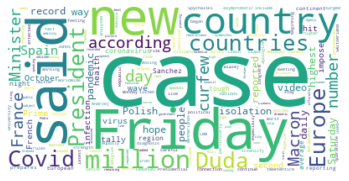

In [12]:
fig = plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Exercise 5. Summarize the text in 250 words using extractive summarization

In [13]:
from gensim.summarization import summarize

In [14]:
summ_words = summarize(s, word_count = 250)
print("Word count summary \n")
print(summ_words)

Word count summary 

European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class.
Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.
Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.
"The second wave has hit the entire Europe equally," Prime Minister Mateusz Morawiecki said Friday.
The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages, as analyzed by CNN.The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France.In all five countries, the number of new infections has surged since the beginning of October.
French President Emmanuel Macron warned Friday that his country needs